# Введение

В ходе выполнения первых 4 домашних заданий "Формальные языки" было реализовано 3 алгоритма для выполнения контекстно свободных запросов к графам.

Целью данной работы является сравнение полученных решений с целью определить, какая из 3 реализаций контекстно свободных запросов к графам является более быстрой при различных начальных условиях, а также сравнение полученных решений с ранее реализованными для выполнения регулярных запросов.

# Описание исследуемых решений

В данной работе сравниваются 3 алгоритма для выполнения контекстно свободных запросов к графам:
1. Алгоритм Хеллингса. Описание алгоритма можно найти [в данном материале](./resources/task12/FormalLanguageConstrainedReachabilityLectureNotes.pdf) в главе 9.2 Алгоритм для графов на основе CYK. Коротко, суть алгоритма заключается в том, что мы представляем входную грамматику в ослабленной нормальной форме Хомского, а все терминалы на ребрах графа подменяем на нетерминалы, из которых они выводятся (если это возможно). Далее, мы считаем, что две вершины $v_0, v_1$ соединены с помощью нетерминала $A$, если между ними существует вершина $u$ такая, что $v_0, u$ соединены с помощью нетерминала $B$, $u, v_1$ соединены с помощью нетерминала $C$ и в исходной грамматике, преобразованной к ослабленной нормальной форме Хомского, существует правило $A -> B C$, либо если между ними существует ребро по нетерминалу $D$ принадлежащему исходной грамматике. Так как все правила в ослабленной нормальной форме Хомского имеют вид $A -> B C$, $D -> d$ или $E -> epsilon$, то нахождение всех соединенных по озвученному правилу вершин гарантирует нам нахождение всех пар вершин, между которыми существует путь, выводимый в грамматике.
2. Матричный алгоритм. Описание алгоритма можно найти [в данном материале](./resources/task12/FormalLanguageConstrainedReachabilityLectureNotes.pdf) в главе 10.1 Алгоритм контекстно-свободной достижимости через произведение матриц. Коротко, данный алгоритм является адаптацией предыдущего на использование с матрицами. В данном случае мы считаем, что граф представляется как матрица смежности с множествами нетерминалов в ячейках и со специально определенными операциями умножения и сложения для этих ячеек.
3. Тензорный алгоритм. Описание алгоритма можно найти [в данном материале](./resources/task12/FormalLanguageConstrainedReachabilityLectureNotes.pdf) в главе 11.2 Алгоритм. В основе подхода лежит использование рекурсивных автоматов в качестве представления контекстно-свободных грамматик и использование тензорного произведения для нахождения пересечения автоматов. Данный подход, в отличие от предыдущих, не требует перевода грамматик в ослабленную нормальную форму Хомского.

Непосредственно реализации данных алгоритмов могут быть найдены в [данном модуле](../project/context_free_path_query.py).

# Постановка задачи

Данная работа призвана ответить на следующие вопросы:
1. Какой из трёх указанных алгоритмов обладает лучшей производительностью?
2. Имеет ли смысл для решения задачи достижимости с регулярными ограничениями использовать алгоритмы для КС ограничений (ведь регулярные --- частный случай КС) или всё же лучше использовать специализированные алгоритмы для регулярных ограничений?

# Набор данных для эксперимента

Для проведения экспериментов были использованы графы из [датасета](https://jetbrains-research.github.io/CFPQ_Data/dataset/index.html), а именно:
* Графы языка Си: [bzip](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/bzip.html#bzip) и [gzip](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/gzip.html#gzip)
* Графы RDF: [skos](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/skos.html#skos) и [pizza](https://formallanguageconstrainedpathquerying.github.io/CFPQ_Data/graphs/data/pizza.html#pizza)

При этом для различных групп графов также были выбраны грамматики, относительно которых будет решаться задача контекстно свободной достижимости:
* Графы языка Си (далее данная грамматика будет фигурировать под названием grammar_C):
<pre>
S -> d_r V d
V -> V1 V2 V3
V1 -> epsilon
V1 -> V2 a_r V1
V2 -> epsilon
V2 -> S
V3 -> epsilon
V3 -> a V2 V3
</pre>
* Графы RDF (далее данная грамматика будет фигурировать под названием grammar_RDF):
<pre>
S -> subClassOf_r S subClassOf | subClassOf_r subClassOf
S -> type_r S type | type_r type
</pre>

Грамматики были выбраны из раздела "Canonical grammars" для соответствующих графов.

Выбор именно этих графов обусловлен тем, что на больших графах, чем выбранные, замеры занимали слишком много времени на имеющемся железе

В качестве регулярных выражений для экспериментов были выбраны 3 вида ([аналогично предыдущей работе](./task5_report.ipynb)):
1. Регулярное выражение, допускающее любое слово из алфавита меток
2. Регулярное выражение, допускающее один символ из алфавита меток
3. Регулярное выражение, содержащее все основные конструкции регулярных выражений

# Описание эксперимента

### Оборудование

Все тесты производились на следующей конфигурации:
* Операционная система - Ubuntu 22.04.1 LTS
* Процессор
<pre>
Архитектура:             x86_64
CPU(s):                  4
ID прроизводителя:       GenuineIntel
  Имя модели:            Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz
    Потоков на ядро:     2
    CPU max MHz:         3000,0000
    CPU min MHz:         500,0000
</pre>
* Оперативная память - 16 гигабайт

### Методика проведения замеров

Для проведения замеров времени выполнения регулярных запросов была написана функция time, которая позволяет заданное количество раз (в тестах автора это 10 раз) выполнить каждый из алгоритмов на конкретном графе, а также посчитать среднее время выполнения заданного фрагмента кода (в секундах), а также узнать среднее квадратическое отклонение этого времени. Также на максимальное время исполнения был поставлен лимит в 360 секунд (6 минут), так как иначе некоторые замеры могли длиться слишком долго.

In [3]:
import logging
import random
import signal
import statistics
from timeit import timeit

import cfpq_data
import matplotlib.pyplot as plt
import numpy as np
from networkx import MultiDiGraph
from pyformlang.regular_expression import Regex

from project.graph_utils import from_graph_to_graph_data

execution_times_number = 10
timeout_seconds = 360

class TimeoutException(Exception):
    pass

def time(stmt) -> tuple[float, float]:
    """
    Measure time of execution of given statement
    :param stmt: statement which execution time must be measured
    :return: 2 element tuple with mean and standard deviation of measured times (standard deviation will be -1 if was exceed timeout)
    """
    def signal_handler(sig, fr):
        raise TimeoutException()

    def timeout_helper():
        signal.signal(signal.SIGALRM, signal_handler)
        signal.alarm(timeout_seconds)
        try:
            stmt()
        finally:
            signal.alarm(0)

    times = []
    for i in range(execution_times_number):
        try:
            times.append(timeit(stmt=timeout_helper, number=1))
        except TimeoutException:
            logging.log(level=logging.WARNING, msg="Timeout exceed")
            return timeout_seconds, -1

    return statistics.mean(times), statistics.stdev(times)

Функция для генерации регулярных выражений для конкретного графа

In [4]:
def generate_regexes(graph: MultiDiGraph) -> list[Regex]:
    """
    Generates test regexes for given graph
    :param graph: graph, which alphabet must be used for regex
    :return: list or generated regexes
    """
    graph_data = from_graph_to_graph_data(graph)

    def regex1():
        string_regex = "|".join(graph_data.labels)
        return Regex(f'({string_regex})*')

    def regex2():
        string_regex = random.choice(list(graph_data.labels))
        return Regex(f'{string_regex}')

    def regex3():
        list_of_labels = list(graph_data.labels)
        a, b = random.choices(list_of_labels, k=2)
        while b == a:
            b = random.choice(list_of_labels)
        string_regex = f'({a}.{a}*.{b})|{b}'
        return Regex(string_regex)

    return [regex1(), regex2(), regex3()]

Объявление графов, соответствующих им грамматик, а также генерация регулярных выражений для проведения последующих экспериментов

In [5]:
from pyformlang.cfg import CFG

logging.disable(level=logging.INFO)

test_grammar_C = CFG.from_text("""
    S -> d_r V d
    V -> V1 V2 V3
    V1 -> epsilon
    V1 -> V2 a_r V1
    V2 -> epsilon
    V2 -> S
    V3 -> epsilon
    V3 -> a V2 V3
""")
test_grammar_RDF = CFG.from_text("""
    S -> subClassOf_r S subClassOf | subClassOf_r subClassOf
    S -> type_r S type | type_r type
""")

test_graph_RDF = ["skos", "pizza"]
test_graph_C = ["bzip", "gzip"]

test_graph_names = test_graph_C + test_graph_RDF

test_graphs = dict()
test_regexes = dict()
test_grammars = dict()
for name in test_graph_names:
    data = cfpq_data.graph_from_csv(cfpq_data.dataset.download(name))
    data = cfpq_data.graphs.utils.add_reverse_edges(data)
    test_graphs[name] = data
    test_regexes[name] = generate_regexes(data)
    test_grammars[name] = list()
    for i in range(3):
        regex = test_regexes[name][i]
        regex_name = f'regex: {str(regex)}'
        if i == 0:
            regex_name = 'regex: .*'
        test_grammars[name].append((f'[{name}] {regex_name}', regex.to_cfg()))
    if name in test_graph_RDF:
        test_grammars[name].append((f"[{name}] grammar_RDF", test_grammar_RDF))
    else:
        test_grammars[name].append((f"[{name}] grammar_C", test_grammar_C))


# Эксперимент

### Какой из трёх указанных алгоритмов обладает лучшей производительностью?

Проведем замеры алгоритмов на выбранных графах

In [6]:
from project.context_free_path_query import context_free_path_query, Algorithm

experiment1_results = []
for name in test_graphs:
    for grammar_name, grammar in test_grammars[name]:
        time_on_hellings = time(lambda: context_free_path_query(
                cfg=grammar,
                graph=test_graphs[name],
                algorithm=Algorithm.HELLINGS
            ))
        time_on_matrix = time(lambda: context_free_path_query(
                cfg=grammar,
                graph=test_graphs[name],
                algorithm=Algorithm.MATRIX
            ))
        time_on_tensor = time(lambda: context_free_path_query(
                cfg=grammar,
                graph=test_graphs[name],
                algorithm=Algorithm.TENSOR
            ))
        experiment1_results.append((
            name, grammar_name, time_on_hellings, time_on_matrix, time_on_tensor
        ))


[2022-12-17 18:15:58]>WARNING>Timeout exceed
[2022-12-17 18:22:39]>WARNING>Timeout exceed
[2022-12-17 20:13:27]>WARNING>Timeout exceed
[2022-12-17 20:20:09]>WARNING>Timeout exceed


И выведем результаты

In [7]:
from IPython.core.display import Markdown
from experiments.experiment_utils import concat_as_time_result, print_table, regex_to_markdown

rows = []
for name, grammar_name, time_on_hellings, time_on_matrix, time_on_tensor in experiment1_results:
    rows.append([name, regex_to_markdown(grammar_name), concat_as_time_result(*time_on_hellings), concat_as_time_result(*time_on_matrix), concat_as_time_result(*time_on_tensor)])

display(Markdown("##### Comparison of CFPQ algorithms"))
display(Markdown(print_table(["Graph name", "Grammar", "Hellings (mean + sd)", "Matrix (mean + sd)", "Tensor (mean + sd)"], rows)))

##### Comparison of CFPQ algorithms

| Graph name |                                   Grammar                                   | Hellings (mean + sd) | Matrix (mean + sd) | Tensor (mean + sd) |
|:----------:|:---------------------------------------------------------------------------:|:--------------------:|:------------------:|:------------------:|
|    bzip    |                               [bzip] regex: .*                              |   54.384 +- 19.046   |   0.143 +- 0.005   |  13.010 +- 1.814   |
|    bzip    |                               [bzip] regex: d                               |    0.014 +- 0.001    |   0.013 +- 0.002   |   0.203 +- 0.005   |
|    bzip    |                     [bzip] regex: ((d.((d)*.d_r))\|d_r)                     |    0.440 +- 0.012    |   0.027 +- 0.000   |   3.193 +- 0.088   |
|    bzip    |                               [bzip] grammar_C                              |    7.459 +- 0.026    |   0.083 +- 0.001   |   7.395 +- 0.063   |
|    gzip    |                               [gzip] regex: .*                              |    timeout exceed    |   4.044 +- 0.012   |   timeout exceed   |
|    gzip    |                               [gzip] regex: a                               |    0.258 +- 0.007    |   0.176 +- 0.006   |   3.583 +- 0.117   |
|    gzip    |                     [gzip] regex: ((d_r.((d_r)*.a))\|a)                     |    6.943 +- 2.030    |   0.645 +- 0.184   |  42.219 +- 8.441   |
|    gzip    |                               [gzip] grammar_C                              |  259.358 +- 44.154   |   0.455 +- 0.008   |  106.696 +- 2.728  |
|    skos    |                               [skos] regex: .*                              |  129.306 +- 10.744   |   0.123 +- 0.034   |  78.483 +- 7.692   |
|    skos    |                           [skos] regex: inverseOf                           |    0.000 +- 0.000    |   0.001 +- 0.000   |   0.084 +- 0.004   |
|    skos    | [skos] regex: ((inverseOf.((inverseOf)*.subPropertyOf_r))\|subPropertyOf_r) |    0.005 +- 0.000    |   0.007 +- 0.001   |   0.298 +- 0.019   |
|    skos    |                              [skos] grammar_RDF                             |    0.006 +- 0.001    |   0.009 +- 0.001   |   0.100 +- 0.007   |
|   pizza    |                              [pizza] regex: .*                              |    timeout exceed    |   4.210 +- 0.048   |   timeout exceed   |
|   pizza    |                         [pizza] regex: complementOf                         |    0.003 +- 0.001    |   0.018 +- 0.001   |   0.430 +- 0.014   |
|   pizza    |        [pizza] regex: ((complementOf.((complementOf)*.range))\|range)       |    0.073 +- 0.003    |   0.030 +- 0.001   |   0.865 +- 0.042   |
|   pizza    |                             [pizza] grammar_RDF                             |    1.482 +- 0.047    |   0.051 +- 0.002   |   1.024 +- 0.019   |

Те же результаты в виде графика

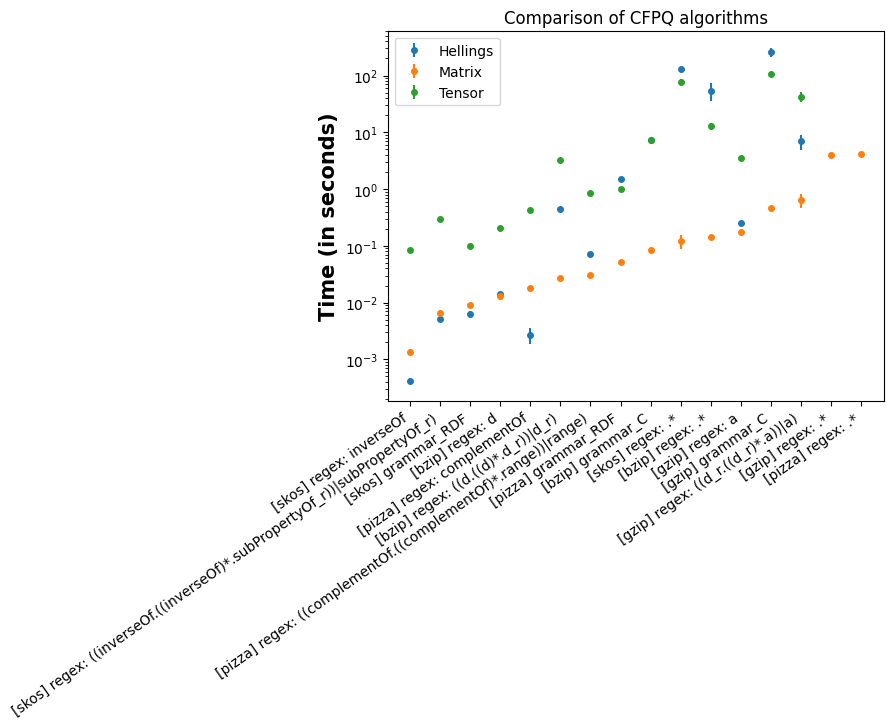

In [8]:
def add_errorbar_for(ax, x, mean_and_sd, label):
    new_x = list()
    y = list()
    yerr = list()

    for i in range(len(mean_and_sd)):
        mean, sd = mean_and_sd[i]
        if sd < 0:
            continue
        new_x.append(x[i])
        y.append(mean)
        yerr.append(sd)

    ax.errorbar(new_x, y, yerr=yerr, fmt='o', label=label, markersize=4)

def plot_experiment1_results():
    x = np.arange(len(experiment1_results))
    hellings_mean_and_sd = list(map(lambda r: r[2], experiment1_results))
    matrix_mean_and_sd = list(map(lambda r: r[3], experiment1_results))
    tensor_mean_and_sd = list(map(lambda r: r[4], experiment1_results))

    fig, ax = plt.subplots()

    add_errorbar_for(ax, x, hellings_mean_and_sd, "Hellings")
    add_errorbar_for(ax, x, matrix_mean_and_sd, "Matrix")
    add_errorbar_for(ax, x, tensor_mean_and_sd, "Tensor")

    ax.set_xticks(x)
    grammars = list(map(lambda r: r[1], experiment1_results))
    ax.set_xticklabels(grammars, rotation=35, ha='right')
    plt.ylabel('Time (in seconds)', fontweight ='bold', fontsize = 15)
    ax.set_title('Comparison of CFPQ algorithms')

    plt.yscale('log')
    plt.legend()
    plt.show()

experiment1_results.sort(key=lambda r: r[3][0])
plot_experiment1_results()

Как можно видеть на графике, на подавляющем большинстве начальных данных матричный алгоритм оказался быстрее двух предложенных аналогов. Самым медленным же оказалась предложенная реализация тензорного алгоритма. Алгоритм Хеллингса, в зависимости от начальных данных, мог быть как медленнее тензорного, так и быстрее. Таким образом, можно сделать вывод, что матричный алгоритм обладает лучшей производительностью из трех предложенных, при этом разница может быть очень существенной в зависимости от начальных данных. Вероятнее всего, такое превосходство предложенной реализации матричного алгоритма над остальными достигается с помощью наиболее оптимального выбора структуры данных и способа работы с ней. В матричном алгоритме после булевой декомпозиции графа мы лишь делаем сложения и умножения разреженных матриц, что выполняется очень быстро с помощью библиотеки scipy. В то же время в предложенной реализации тензорного алгоритма нам приходится достаточно часто обновлять разреженные матрицы с помощью доступа к элементу по индексу, что требует лишних преобразований между форматами разреженных матриц. Предложенная реализация алгроритма Хеллингса же просто не использует разреженные матрицы и базируется на других структурах данных, которые, судя по результатам, меньше подходят для предложенной задачи.

### Имеет ли смысл для решения задачи достижимости с регулярными ограничениями использовать алгоритмы для КС ограничений (ведь регулярные --- частный случай КС) или всё же лучше использовать специализированные алгоритмы для регулярных ограничений?

Так как в среднем матричный алгоритм в предыдущем тесте показал себя как лучший, будем сравнивать именно его с алгоритмом, который был наиболее быстрым в предыдущем эксперименте - алгоритм выполнения регулярных запросов, основанный на пересечение графа и регулярного выражения как конечных автоматов.


In [9]:
from project.regular_path_query import regular_path_query

experiment2_results = []
for name in test_graphs:
    for i in range(len(test_regexes[name])):
        regex = test_regexes[name][i]
        grammar_name, grammar = test_grammars[name][i]
        time_on_matrix = time(lambda: context_free_path_query(
                cfg=grammar,
                graph=test_graphs[name],
                algorithm=Algorithm.MATRIX
            ))
        time_on_automata_intersection = time(lambda: regular_path_query(
                regex=regex,
                graph=test_graphs[name]
            ))
        experiment2_results.append((
            name, grammar_name, time_on_matrix, time_on_automata_intersection
        ))


Выведем полученные результаты как таблицу

In [10]:
from IPython.core.display import Markdown
from experiments.experiment_utils import concat_as_time_result, print_table, regex_to_markdown

rows = []
for name, grammar_name, time_on_matrix, time_on_automata_intersection in experiment2_results:
    rows.append([name, regex_to_markdown(grammar_name), concat_as_time_result(*time_on_matrix), concat_as_time_result(*time_on_automata_intersection)])

display(Markdown("##### Comparison of fastest CFPQ and RPQ algorithms"))
display(Markdown(print_table(["Graph name", "Grammar",  "Matrix (mean + sd)", "Automata intersection (mean + sd)"], rows)))

##### Comparison of fastest CFPQ and RPQ algorithms

| Graph name |                                   Grammar                                   | Matrix (mean + sd) | Automata intersection (mean + sd) |
|:----------:|:---------------------------------------------------------------------------:|:------------------:|:---------------------------------:|
|    bzip    |                               [bzip] regex: .*                              |   0.129 +- 0.020   |           1.872 +- 0.039          |
|    bzip    |                               [bzip] regex: d                               |   0.013 +- 0.000   |           0.338 +- 0.011          |
|    bzip    |                     [bzip] regex: ((d.((d)*.d_r))\|d_r)                     |   0.028 +- 0.001   |           0.552 +- 0.010          |
|    gzip    |                               [gzip] regex: .*                              |   4.416 +- 0.032   |          88.708 +- 1.285          |
|    gzip    |                               [gzip] regex: a                               |   0.138 +- 0.003   |           5.331 +- 0.221          |
|    gzip    |                     [gzip] regex: ((d_r.((d_r)*.a))\|a)                     |   0.200 +- 0.006   |           9.123 +- 0.349          |
|    skos    |                               [skos] regex: .*                              |   0.080 +- 0.002   |           1.355 +- 0.024          |
|    skos    |                           [skos] regex: inverseOf                           |   0.002 +- 0.001   |           0.056 +- 0.002          |
|    skos    | [skos] regex: ((inverseOf.((inverseOf)*.subPropertyOf_r))\|subPropertyOf_r) |   0.006 +- 0.001   |           0.061 +- 0.002          |
|   pizza    |                              [pizza] regex: .*                              |   4.262 +- 0.053   |          53.409 +- 0.355          |
|   pizza    |                         [pizza] regex: complementOf                         |   0.018 +- 0.001   |           0.406 +- 0.014          |
|   pizza    |        [pizza] regex: ((complementOf.((complementOf)*.range))\|range)       |   0.030 +- 0.001   |           0.417 +- 0.015          |

Сравним получившиеся результаты

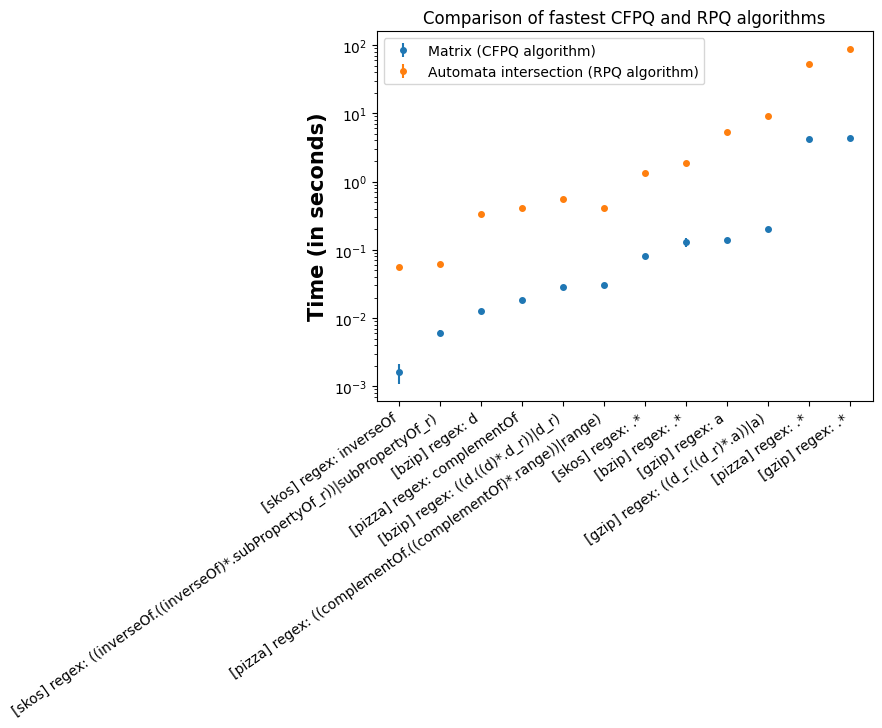

In [11]:
def plot_experiment2_results():
    # example data
    x = np.arange(len(experiment2_results))
    matrix_mean_and_sd = list(map(lambda r: r[2], experiment2_results))
    automata_intersection_mean_and_sd = list(map(lambda r: r[3], experiment2_results))

    fig, ax = plt.subplots()

    # standard error bars
    add_errorbar_for(ax, x, matrix_mean_and_sd, "Matrix (CFPQ algorithm)")
    add_errorbar_for(ax, x, automata_intersection_mean_and_sd, "Automata intersection (RPQ algorithm)")

    # tidy up the figure
    ax.set_xticks(x)
    grammars = list(map(lambda r: r[1], experiment2_results))
    ax.set_xticklabels(grammars, rotation=35, ha='right')
    plt.ylabel('Time (in seconds)', fontweight ='bold', fontsize = 15)
    ax.set_title('Comparison of fastest CFPQ and RPQ algorithms')

    plt.yscale('log')
    plt.legend()
    plt.show()

experiment2_results.sort(key=lambda r: r[2][0])
plot_experiment2_results()

Как можно видеть по результатам проведенного сравнения, не имеет смысла использовать специализированные для регулярных запросов алгоритмы, так как матричный алгоритм для контекстно-свободных запросов обладает лучшей производительностью. По крайней мере на предложенных начальных данных, матричный алгоритм показал себя существенно более быстрым, чем алгоритм выполнения регулярных запросов через пересечение графа и регулярного выражения как конечных автоматов.

# Заключение

Таким образом, благодаря поставленным экспериментам можно подвести итог по поставленным вопросам:
1. Какой из трёх указанных алгоритмов обладает лучшей производительностью? Лучшей производительностью обладает матричный алгоритм для выполнения контекстно-свободных запросов.
2. Имеет ли смысл для решения задачи достижимости с регулярными ограничениями использовать алгоритмы для КС ограничений (ведь регулярные --- частный случай КС) или всё же лучше использовать специализированные алгоритмы для регулярных ограничений? На выбранных графах и регулярных выражениях матричный алгоритм для выполнения контекстно-свободных запросов показал себя как самый быстрый по сравнению со специализированными алгоритмами для регулярных запросов.